In [914]:
import pandas as pd
import numpy as np

In [915]:
df=pd.read_csv('train.csv')

C:\Users\yash\AppData\Local\Temp\ipykernel_7172\3155070436.py:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  df=pd.read_csv('train.csv')


In [916]:
df

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [917]:
df=df.dropna()

In [1011]:
df.shape

(4827, 34)

In [918]:
from sklearn.utils import resample
df_good = df[df['Credit_Score'] == 'Good']
df_standard = df[df['Credit_Score'] == 'Standard']
df_poor = df[df['Credit_Score'] == 'Poor']

# Find the smallest class size
min_size = min(len(df_good), len(df_standard), len(df_poor))

# Down-sample the majority classes
df_good_downsampled = resample(df_good, replace=False, n_samples=min_size, random_state=42)
df_standard_downsampled = resample(df_standard, replace=False, n_samples=min_size, random_state=42)
df_poor_downsampled = resample(df_poor, replace=False, n_samples=min_size, random_state=42)

# Combine
df_balanced = pd.concat([df_good_downsampled, df_standard_downsampled, df_poor_downsampled])

# Shuffle dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

df=df_balanced


In [919]:
credit_score_counts = df['Credit_Score'].value_counts()

print(credit_score_counts)

Credit_Score
Poor        8582
Standard    8582
Good        8582
Name: count, dtype: int64


In [920]:
df.columns

Index(['ID', 'Customer_ID', 'Month', 'Name', 'Age', 'SSN', 'Occupation',
       'Annual_Income', 'Monthly_Inhand_Salary', 'Num_Bank_Accounts',
       'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Type_of_Loan',
       'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Changed_Credit_Limit',
       'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt',
       'Credit_Utilization_Ratio', 'Credit_History_Age',
       'Payment_of_Min_Amount', 'Total_EMI_per_month',
       'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance',
       'Credit_Score'],
      dtype='object')

In [921]:
df.drop(columns=['ID','Customer_ID','Month','Name','Age','SSN','Occupation'], inplace=True)


In [922]:
df

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,20196.67,1679.055833,9,9,17,7,"Not Specified, Personal Loan, Credit-Builder L...",51,22,26.96,...,_,2971.91,36.028724,5 Years and 7 Months,Yes,66.811004,27.314798347474703,High_spent_Medium_value_payments,323.77978137586473,Poor
1,17502.19,1380.515833,7,5,6,5,"Credit-Builder Loan, Student Loan, Credit-Buil...",5,11,11.32,...,Standard,251.99,33.290380,13 Years and 6 Months,Yes,52.999514,58.67183240816764,Low_spent_Small_value_payments,316.38023686060694,Standard
2,61224.33,4862.027500,4,5,12,1,Home Equity Loan,29,12,12.65,...,Standard,707.43,24.283948,16 Years and 8 Months,Yes,38.309810,70.35849413231986,High_spent_Large_value_payments,617.5344455578779,Standard
3,16594.51,1642.875833,9,8,18,8,"Mortgage Loan, Credit-Builder Loan, Home Equit...",15,16,2.54,...,Bad,3345.56,27.357150,10 Years and 1 Months,Yes,68.248891,45.1269310750624,High_spent_Small_value_payments,310.9117614286125,Poor
4,57856.2_,4605.350000,8,7,17,3,"Personal Loan, Student Loan, and Not Specified",16,19,1.02,...,Standard,853.8,32.710327,30 Years and 5 Months,No,139.470694,110.52781748009527,High_spent_Medium_value_payments,460.53648862478525,Standard
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25741,82316.18,6625.681667,0,5,4,3,"Not Specified, Debt Consolidation Loan, and Pa...",23,12,11.0,...,Good,42.98,28.978156,17 Years and 10 Months,No,133.893759,613.5544201419577,Low_spent_Medium_value_payments,195.1199878650817,Poor
25742,76519.3,6277.608333,5,7,10,4,"Student Loan, Home Equity Loan, Auto Loan, and...",5,5,10.43,...,Good,260.85,36.584495,31 Years and 8 Months,No,228.543419,189.47227303879953,High_spent_Medium_value_payments,459.74514090097466,Good
25743,18407.68,1685.973333,4,3,4,-100,"Home Equity Loan, Student Loan, Personal Loan,...",14,6,11.99,...,Good,1199.21,30.803697,16 Years and 7 Months,No,36.330373,47.61695539795094,High_spent_Medium_value_payments,334.6500048439665,Good
25744,13139.855,1015.987917,5,5,15,1,Debt Consolidation Loan,8,12,8.54,...,_,361.58,31.930302,23 Years and 3 Months,NM,7.183338,49.95951732059647,Low_spent_Small_value_payments,334.4559362478996,Standard


In [923]:
df['Type_of_Loan'].unique()

array(['Not Specified, Personal Loan, Credit-Builder Loan, Home Equity Loan, Home Equity Loan, Home Equity Loan, and Student Loan',
       'Credit-Builder Loan, Student Loan, Credit-Builder Loan, Home Equity Loan, and Student Loan',
       'Home Equity Loan', ...,
       'Not Specified, Credit-Builder Loan, Mortgage Loan, Personal Loan, Not Specified, Student Loan, Auto Loan, Mortgage Loan, and Credit-Builder Loan',
       'Student Loan, Credit-Builder Loan, Student Loan, Payday Loan, and Home Equity Loan',
       'Home Equity Loan, Mortgage Loan, Auto Loan, Payday Loan, Debt Consolidation Loan, and Credit-Builder Loan'],
      dtype=object)

In [924]:
df['Num_of_Loan'].unique()

array(['7', '5', '1', '8', '3', '9', '4_', '2', '-100', '6', '4', '1_',
       '9_', '6_', '2_', '7_', '3_', '5_', '449', '65', '562', '275',
       '52', '1103', '8_', '1470', '1171_', '1040', '1209', '1152', '284',
       '1424', '191', '492', '1259', '1279', '1294', '251', '1228', '332',
       '1015', '344', '311', '936', '955', '319', '1077', '49', '898',
       '574', '527', '430', '1461', '1150', '757', '1019', '1088', '834',
       '1412', '662', '1289', '1181', '904', '132', '501', '192', '649',
       '1017', '1297', '466', '659', '869', '1127', '633', '1214', '1457',
       '630_', '799', '472', '227_', '701', '617', '217', '404', '1307',
       '1384', '1023', '54', '101', '164', '228', '1185_', '19', '638',
       '1313', '875', '1196', '978', '563', '1480', '1459_', '227',
       '785_', '55', '1216', '833', '78', '1298', '967', '1406', '292',
       '656', '1008', '742', '777', '579', '138', '1433', '56', '418',
       '289', '1030', '87', '613', '1054', '316', '653', '6

In [925]:
def count_loans(loan_str):
    if pd.isna(loan_str):
        return 0
    return len(loan_str.split(', '))

df['Counted_Loans'] = df['Type_of_Loan'].apply(count_loans)
df['Num_of_Loan'] = df['Counted_Loans']
df.drop(columns=['Counted_Loans'], inplace=True)

In [926]:
df['Num_of_Loan'].unique()

array([7, 5, 1, 8, 3, 9, 4, 2, 6], dtype=int64)

In [927]:
df['Num_Bank_Accounts'].unique()

array([   9,    7,    4,    8,    3,    2,    0,   10,    5,    6,    1,
        179, 1775,  777, 1344, 1298,  560,  632, 1774,  392, 1668, 1342,
        992, 1777, 1794,  581, 1114, 1065,  217,   64,  868,  360,  417,
       1153, 1249,  210,  684, 1676,  196, 1467,  473,  795,  512, 1638,
        328, 1458,  157,  314,  521, 1628, 1318,  339, 1657, 1734,   -1,
       1491, 1361, 1703, 1627, 1528, 1502, 1429, 1763,  791,   53, 1654,
       1060,  475,  514,  121,  851,  926,   72,  967,  490, 1137, 1166,
        434,  302, 1789,  628,  122, 1453,  505, 1358, 1207, 1733, 1670,
       1395,  488, 1731,  424,  786,  666,  854, 1617,  409,  703,   27,
       1297,  771,  847, 1719, 1600,  993, 1337,  280,  980,  624,  526,
        354,  308, 1606,  243,  933,  397,   77, 1352,  812,  616, 1013,
       1481, 1616, 1595,  385,  333, 1634, 1594, 1389,  316,  797, 1479,
        105, 1511,  265, 1039,  484, 1574,  801, 1576,  310,  441,  845,
        493,  672,   45, 1631,  889,   70,  540,  4

In [928]:
(df['Num_Bank_Accounts'] > 50).sum()

339

In [929]:
df = df[df['Num_Bank_Accounts'] <= 50]

In [930]:
df = df[df['Num_Bank_Accounts'] >=0 ]

In [931]:
df['Num_Bank_Accounts'].unique()

array([ 9,  7,  4,  8,  3,  2,  0, 10,  5,  6,  1, 27, 45, 11, 33, 42, 34,
       39, 30, 28, 50], dtype=int64)

In [932]:
(df['Num_Credit_Card'] > 50).sum()

596

In [933]:
df = df[df['Num_Credit_Card'] <= 50]

In [934]:
(df['Interest_Rate'] > 20).sum()

6280

In [935]:
df = df[df['Interest_Rate'] <= 50]

In [936]:
(df['Num_of_Loan'] > 10).sum()

0

In [937]:
(df['Delay_from_due_date'] > 60).sum()

315

In [938]:
df['Delay_from_due_date'] = pd.to_numeric(df['Delay_from_due_date'], errors='coerce')

In [939]:
df['Num_of_Delayed_Payment'] = pd.to_numeric(df['Num_of_Delayed_Payment'], errors='coerce')

In [940]:
(df['Num_of_Delayed_Payment'] < 0).sum()

206

In [941]:
df = df[df['Num_of_Delayed_Payment'] >=0]

In [942]:
df['Changed_Credit_Limit'].dtype

dtype('O')

In [943]:
df['Changed_Credit_Limit'] = pd.to_numeric(df['Changed_Credit_Limit'], errors='coerce')

In [944]:
df['Changed_Credit_Limit'].isna().sum()

467

In [945]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,23338.000000,23338.000000,23338.000000,23338.000000,23338.00000,23338.000000,23338.000000,22871.000000,23338.000000,23338.000000,23338.000000
mean,4195.976637,5.239909,5.467478,14.252292,3.84146,20.601937,33.101123,10.062244,26.543063,32.270538,1424.960008
std,3223.482511,2.741492,2.214838,9.017470,2.17487,15.292758,246.038639,6.760811,186.802918,5.092128,8263.598006
min,303.645417,0.000000,0.000000,1.000000,1.00000,-5.000000,0.000000,-6.480000,0.000000,21.434746,4.462837
25%,1621.305625,3.000000,4.000000,7.000000,2.00000,9.000000,8.000000,4.960000,3.000000,28.081083,41.783652
50%,3088.475000,5.000000,5.000000,12.000000,3.00000,17.000000,13.000000,9.110000,6.000000,32.309942,79.611824
75%,5947.452500,7.000000,7.000000,20.000000,5.00000,28.000000,18.000000,14.260000,9.000000,36.500765,171.321758
max,15167.180000,50.000000,46.000000,34.000000,9.00000,67.000000,4397.000000,36.090000,2594.000000,49.564519,82236.000000


In [946]:
df['Num_Credit_Inquiries'].unique()

array([1.100e+01, 4.000e+00, 5.000e+00, 1.300e+01, 0.000e+00, 1.000e+00,
       3.000e+00, 8.000e+00, 7.000e+00, 1.000e+01, 6.000e+00, 9.000e+00,
       2.000e+00, 1.291e+03, 1.200e+01, 1.700e+01, 1.500e+01, 1.400e+01,
       2.239e+03, 9.300e+01, 7.690e+02, 1.227e+03, 1.523e+03, 1.017e+03,
       1.600e+01, 3.600e+02, 1.053e+03, 2.297e+03, 1.905e+03, 1.299e+03,
       2.344e+03, 1.085e+03, 2.356e+03, 1.247e+03, 4.960e+02, 2.331e+03,
       6.920e+02, 1.175e+03, 2.190e+03, 7.260e+02, 7.800e+01, 2.061e+03,
       4.880e+02, 2.150e+03, 1.761e+03, 2.187e+03, 2.351e+03, 1.063e+03,
       1.220e+03, 4.600e+02, 1.220e+02, 2.397e+03, 2.515e+03, 6.990e+02,
       2.373e+03, 3.040e+02, 6.420e+02, 1.172e+03, 1.278e+03, 1.050e+03,
       4.640e+02, 1.796e+03, 1.046e+03, 2.367e+03, 1.541e+03, 1.375e+03,
       5.760e+02, 1.158e+03, 1.566e+03, 2.131e+03, 2.241e+03, 4.450e+02,
       1.160e+02, 2.240e+03, 2.302e+03, 1.584e+03, 2.323e+03, 2.780e+02,
       1.991e+03, 9.140e+02, 2.374e+03, 2.118e+03, 

In [947]:
(df['Num_Credit_Inquiries'] > 20).sum()

381

In [948]:
df = df[df['Num_of_Delayed_Payment'] <=20]

In [949]:
df['Credit_Mix'].unique()

array(['Standard', 'Bad', '_', 'Good'], dtype=object)

In [950]:
(df['Credit_Mix'] == '_').sum()

4094

In [951]:
df = df[df['Credit_Mix'] !='_']

In [952]:
df['Outstanding_Debt'].unique()

array(['251.99', '707.43', '3345.56', ..., '1211.28', '474.74', '1199.21'],
      dtype=object)

In [953]:
df['Outstanding_Debt'] = pd.to_numeric(df['Outstanding_Debt'], errors='coerce')

In [954]:
def convert_to_months(age_str):
    years_part = age_str.split('Years and')[0].strip()
    months_part = age_str.split('Years and')[1].strip().replace('Months', '').strip()
    
    years = int(years_part) if years_part else 0
    months = int(months_part) if months_part else 0
    
    total_months = years * 12 + months
    return total_months

# Apply the conversion function
df['Credit_History_Age_Months'] = df['Credit_History_Age'].apply(convert_to_months)

# If you prefer to have age in years, you can convert months back to years
df['Credit_History_Age'] = df['Credit_History_Age_Months'] / 12

In [955]:
df['Credit_History_Age'].unique()

array([13.5       , 16.66666667, 10.08333333, 30.41666667, 25.75      ,
       23.91666667, 22.25      ,  7.83333333,  7.41666667, 27.5       ,
       18.25      , 17.5       , 33.16666667,  5.16666667,  5.5       ,
        8.5       , 29.25      , 32.83333333, 15.33333333, 23.5       ,
       17.83333333, 16.83333333, 18.91666667, 20.66666667, 29.16666667,
       26.75      , 24.75      , 19.        , 20.33333333, 18.        ,
       27.25      , 20.16666667, 18.58333333, 18.33333333, 19.41666667,
       10.41666667, 30.        , 19.75      , 18.16666667,  6.58333333,
       15.5       , 18.83333333, 16.25      , 20.5       , 32.91666667,
       18.08333333, 31.58333333, 16.91666667, 14.75      , 23.        ,
       21.75      , 21.83333333, 26.58333333,  6.5       , 27.16666667,
       24.66666667, 15.66666667,  8.75      , 12.66666667, 27.75      ,
       10.75      , 29.41666667, 15.75      , 19.66666667, 11.83333333,
       13.83333333,  9.5       , 15.91666667, 12.41666667, 13.25

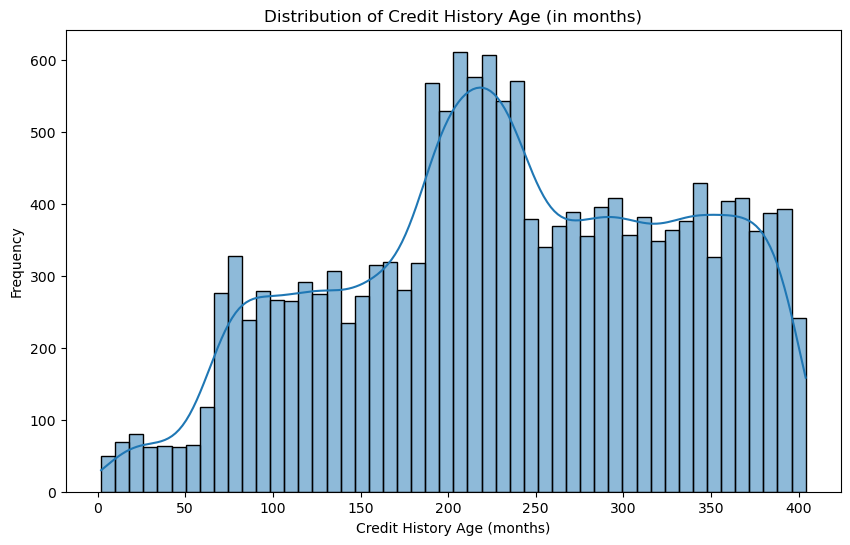

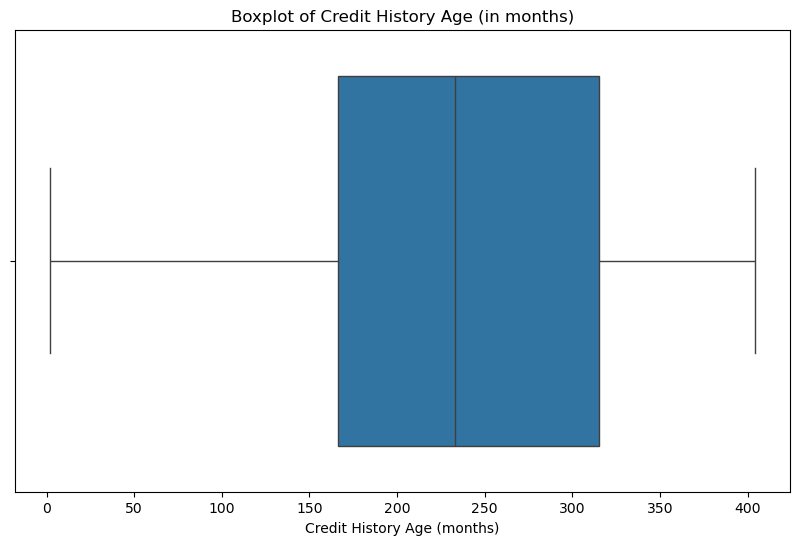

In [956]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histogram
plt.figure(figsize=(10, 6))
sns.histplot(df['Credit_History_Age_Months'], bins=50, kde=True)
plt.title('Distribution of Credit History Age (in months)')
plt.xlabel('Credit History Age (months)')
plt.ylabel('Frequency')
plt.show()

# Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Credit_History_Age_Months'])
plt.title('Boxplot of Credit History Age (in months)')
plt.xlabel('Credit History Age (months)')
plt.show()


In [957]:
df['Payment_of_Min_Amount'] = df['Payment_of_Min_Amount'].map({'Yes': 1, 'No': 0})

In [958]:
df['Payment_of_Min_Amount'].unique()

array([ 1.,  0., nan])

In [959]:
df['Payment_of_Min_Amount'].isna().sum()

2002

In [960]:
df = df.dropna(subset=['Payment_of_Min_Amount'])

In [961]:
df['Payment_of_Min_Amount'] = pd.to_numeric(df['Payment_of_Min_Amount'], errors='coerce')

In [962]:
df['Total_EMI_per_month'].isna().sum()

0

In [963]:
df['Payment_Behaviour'].unique()

array(['Low_spent_Small_value_payments',
       'High_spent_Large_value_payments',
       'High_spent_Small_value_payments',
       'High_spent_Medium_value_payments',
       'Low_spent_Large_value_payments',
       'Low_spent_Medium_value_payments', '!@9#%8'], dtype=object)

In [964]:
df['Payment_Behaviour'] = df['Payment_Behaviour'].replace('!@9#%8', 'Unknown')

In [965]:
df['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      3367
High_spent_Medium_value_payments    2588
High_spent_Large_value_payments     2123
Low_spent_Medium_value_payments     1932
High_spent_Small_value_payments     1665
Low_spent_Large_value_payments      1497
Unknown                             1093
Name: count, dtype: int64

In [966]:
df=df[df['Payment_Behaviour']!='Unknown']

In [967]:
df['Payment_Behaviour'].isna().sum()

0

In [968]:
df['Monthly_Balance'] = pd.to_numeric(df['Monthly_Balance'], errors='coerce')

In [969]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Monthly_Balance,Credit_History_Age_Months
count,13172.000000,13172.000000,13172.000000,13172.000000,13172.000000,13172.000000,13172.000000,12916.000000,13172.000000,13039.000000,13172.000000,13172.000000,13172.000000,13172.000000,13169.000000,13172.000000
mean,4384.674235,4.907076,5.231172,12.959763,3.554054,18.306559,11.600288,9.709846,26.732766,1258.211598,32.367957,19.476256,0.500987,1423.442330,405.507535,233.715077
std,3318.307167,2.686068,2.159411,8.592702,2.014233,13.872578,5.592185,6.296935,189.674823,1033.862119,5.102398,8.036680,0.500018,8246.208469,209.966205,96.440157
min,332.128333,0.000000,0.000000,1.000000,1.000000,-5.000000,0.000000,-6.350000,0.000000,0.230000,21.434746,0.166667,0.000000,4.462837,0.453456,2.000000
25%,1680.550937,3.000000,4.000000,6.000000,2.000000,8.000000,8.000000,4.990000,2.000000,503.605000,28.175558,13.750000,0.000000,40.161950,272.620844,165.000000
50%,3221.948333,5.000000,5.000000,11.000000,3.000000,15.000000,12.000000,9.020000,5.000000,1045.390000,32.421988,19.333333,1.000000,78.038829,341.087435,232.000000
75%,6293.827869,7.000000,7.000000,18.000000,4.000000,25.000000,16.000000,13.470000,8.000000,1620.115000,36.586271,26.166667,1.000000,168.341521,480.899615,314.000000
max,15136.696667,50.000000,43.000000,34.000000,9.000000,67.000000,20.000000,35.890000,2594.000000,4990.910000,49.564519,33.666667,1.000000,82204.000000,1552.946094,404.000000


In [970]:
df['Credit_History_Age_Months'] = pd.to_numeric(df['Credit_History_Age_Months'], errors='coerce')

In [971]:
df.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Monthly_Balance,Credit_History_Age_Months
count,13172.000000,13172.000000,13172.000000,13172.000000,13172.000000,13172.000000,13172.000000,12916.000000,13172.000000,13039.000000,13172.000000,13172.000000,13172.000000,13172.000000,13169.000000,13172.000000
mean,4384.674235,4.907076,5.231172,12.959763,3.554054,18.306559,11.600288,9.709846,26.732766,1258.211598,32.367957,19.476256,0.500987,1423.442330,405.507535,233.715077
std,3318.307167,2.686068,2.159411,8.592702,2.014233,13.872578,5.592185,6.296935,189.674823,1033.862119,5.102398,8.036680,0.500018,8246.208469,209.966205,96.440157
min,332.128333,0.000000,0.000000,1.000000,1.000000,-5.000000,0.000000,-6.350000,0.000000,0.230000,21.434746,0.166667,0.000000,4.462837,0.453456,2.000000
25%,1680.550937,3.000000,4.000000,6.000000,2.000000,8.000000,8.000000,4.990000,2.000000,503.605000,28.175558,13.750000,0.000000,40.161950,272.620844,165.000000
50%,3221.948333,5.000000,5.000000,11.000000,3.000000,15.000000,12.000000,9.020000,5.000000,1045.390000,32.421988,19.333333,1.000000,78.038829,341.087435,232.000000
75%,6293.827869,7.000000,7.000000,18.000000,4.000000,25.000000,16.000000,13.470000,8.000000,1620.115000,36.586271,26.166667,1.000000,168.341521,480.899615,314.000000
max,15136.696667,50.000000,43.000000,34.000000,9.000000,67.000000,20.000000,35.890000,2594.000000,4990.910000,49.564519,33.666667,1.000000,82204.000000,1552.946094,404.000000


In [972]:
df['Credit_History_Age_Years'] = df['Credit_History_Age_Months'] / 12
bins = [0, 12, 24, 36, 48, 60, 120, 180, 240, 300, 360, 404, float('inf')]
labels = ['0-1 Year', '1-2 Years', '2-3 Years', '3-4 Years', '4-5 Years', 
          '5-10 Years', '10-15 Years', '15-20 Years', '20-25 Years', 
          '25-30 Years', '30-35 Years', '35+ Years']

df['Credit_History_Age_Category'] = pd.cut(df['Credit_History_Age_Months'], bins=bins, labels=labels, right=False)

In [973]:
print(credit_history_age_encoder.classes_)


['1-2 Years' '10-15 Years' '15-20 Years' '2-3 Years' '20-25 Years'
 '25-30 Years' '30-35 Years' '35+ Years' '4-5 Years' '5-10 Years']


In [974]:
df

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months,Credit_History_Age_Years,Credit_History_Age_Category
1,17502.19,1380.515833,7,5,6,5,"Credit-Builder Loan, Student Loan, Credit-Buil...",5,11.0,11.32,...,13.500000,1.0,52.999514,58.67183240816764,Low_spent_Small_value_payments,316.380237,Standard,162,13.500000,10-15 Years
2,61224.33,4862.027500,4,5,12,1,Home Equity Loan,29,12.0,12.65,...,16.666667,1.0,38.309810,70.35849413231986,High_spent_Large_value_payments,617.534446,Standard,200,16.666667,15-20 Years
3,16594.51,1642.875833,9,8,18,8,"Mortgage Loan, Credit-Builder Loan, Home Equit...",15,16.0,2.54,...,10.083333,1.0,68.248891,45.1269310750624,High_spent_Small_value_payments,310.911761,Poor,121,10.083333,10-15 Years
4,57856.2_,4605.350000,8,7,17,3,"Personal Loan, Student Loan, and Not Specified",16,19.0,1.02,...,30.416667,0.0,139.470694,110.52781748009527,High_spent_Medium_value_payments,460.536489,Standard,365,30.416667,30-35 Years
6,159560.76_,13580.730000,3,1,6,1,Mortgage Loan,2,11.0,6.67,...,25.750000,0.0,130.037048,500.2642805279679,High_spent_Medium_value_payments,977.771671,Good,309,25.750000,25-30 Years
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25735,150755.48_,12764.956667,4,4,7,4,"Student Loan, Payday Loan, Auto Loan, and Cred...",13,4.0,2.54,...,31.416667,0.0,470.407255,679.8512880994094,Low_spent_Large_value_payments,396.237123,Good,377,31.416667,30-35 Years
25741,82316.18,6625.681667,0,5,4,3,"Not Specified, Debt Consolidation Loan, and Pa...",23,12.0,11.00,...,17.833333,0.0,133.893759,613.5544201419577,Low_spent_Medium_value_payments,195.119988,Poor,214,17.833333,15-20 Years
25742,76519.3,6277.608333,5,7,10,4,"Student Loan, Home Equity Loan, Auto Loan, and...",5,5.0,10.43,...,31.666667,0.0,228.543419,189.47227303879953,High_spent_Medium_value_payments,459.745141,Good,380,31.666667,30-35 Years
25743,18407.68,1685.973333,4,3,4,4,"Home Equity Loan, Student Loan, Personal Loan,...",14,6.0,11.99,...,16.583333,0.0,36.330373,47.61695539795094,High_spent_Medium_value_payments,334.650005,Good,199,16.583333,15-20 Years


In [975]:
df.drop(columns=['Credit_History_Age_Months','Credit_History_Age_Years'],inplace=True)

In [976]:
df=df[df['Changed_Credit_Limit']>0]

In [977]:
df = df[
    (df['Num_Bank_Accounts'] <= 10) &
    (df['Num_Credit_Card'] <= 10) &
    (df['Interest_Rate'] <= 25) &
    (df['Num_Credit_Inquiries'] <= 15)
]

In [978]:
df['Amount_invested_monthly'].dtype

dtype('O')

In [979]:
df['Amount_invested_monthly'] = pd.to_numeric(df['Amount_invested_monthly'], errors='coerce')

In [980]:
df['Annual_Income'].dtype

dtype('O')

In [981]:
df['Annual_Income'] = pd.to_numeric(df['Annual_Income'], errors='coerce')

In [982]:
df.describe()

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance
count,1.019200e+04,10941.000000,10941.000000,10941.000000,10941.000000,10941.000000,10941.000000,10941.000000,10941.000000,10941.000000,10825.000000,10941.000000,10941.000000,10941.000000,10941.000000,10434.000000,10938.000000
mean,1.834980e+05,4606.236319,4.588246,4.948816,10.723883,3.289096,16.274746,11.061786,9.398244,4.658349,1082.813498,32.417472,20.573934,0.438534,1431.583925,203.973295,420.246792
std,1.463389e+06,3402.903317,2.518706,1.940508,6.297723,1.851739,12.271175,5.590262,5.729245,3.416982,907.232034,5.121220,7.689145,0.496230,8257.976573,197.909878,216.615150
min,7.006035e+03,332.128333,0.000000,0.000000,1.000000,1.000000,-5.000000,0.000000,0.010000,0.000000,0.230000,21.434746,0.166667,0.000000,4.462837,0.000000,0.453456
25%,2.129853e+04,1799.320000,3.000000,4.000000,6.000000,2.000000,7.000000,7.000000,5.000000,2.000000,447.660000,28.179963,15.750000,0.000000,39.033509,75.155035,280.124967
50%,4.062605e+04,3380.496667,5.000000,5.000000,10.000000,3.000000,14.000000,11.000000,8.770000,4.000000,912.860000,32.455979,20.416667,0.000000,77.763858,137.081864,354.196435
75%,8.265600e+04,6730.875000,6.000000,6.000000,16.000000,4.000000,23.000000,16.000000,12.350000,7.000000,1370.940000,36.643255,27.000000,1.000000,168.176781,255.356028,505.653446
max,2.419806e+07,15136.696667,10.000000,10.000000,25.000000,9.000000,66.000000,20.000000,35.830000,15.000000,4966.570000,49.564519,33.666667,1.000000,82204.000000,1594.499454,1552.946094


In [983]:
def remove_outliers(df, columns):
    for column in columns:
        # Calculate Q1 (25th percentile) and Q3 (75th percentile)
        Q1 = df[column].quantile(0.25)
        Q3 = df[column].quantile(0.75)
        
        # Calculate the IQR (Interquartile Range)
        IQR = Q3 - Q1
        
        # Define the outlier range
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        # Filter out the outliers
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return df

# Columns with outliers
columns_with_outliers = [
    'Monthly_Inhand_Salary',
    'Changed_Credit_Limit',
    'Outstanding_Debt',
    'Total_EMI_per_month',
    'Monthly_Balance',
    'Amount_invested_monthly',
    'Annual_Income'
]

# Remove outliers
df = remove_outliers(df, columns_with_outliers)

In [984]:
from sklearn.preprocessing import LabelEncoder

# Initialize separate label encoders for each feature
credit_mix_encoder = LabelEncoder()
credit_history_age_encoder = LabelEncoder()
credit_score_encoder = LabelEncoder()

# Fit the encoders to their respective features
df['Credit_Mix'] = credit_mix_encoder.fit_transform(df['Credit_Mix'])
df['Credit_History_Age_Category'] = credit_history_age_encoder.fit_transform(df['Credit_History_Age_Category'])
df['Credit_Score'] = credit_score_encoder.fit_transform(df['Credit_Score'])

In [985]:
df

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,...,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Category
1,17502.19,1380.515833,7,5,6,5,"Credit-Builder Loan, Student Loan, Credit-Buil...",5,11.0,11.32,...,251.99,33.290380,13.500000,1.0,52.999514,58.671832,Low_spent_Small_value_payments,316.380237,2,1
2,61224.33,4862.027500,4,5,12,1,Home Equity Loan,29,12.0,12.65,...,707.43,24.283948,16.666667,1.0,38.309810,70.358494,High_spent_Large_value_payments,617.534446,2,2
10,17728.55,1565.379167,3,6,12,7,"Auto Loan, Auto Loan, Payday Loan, Credit-Buil...",19,14.0,15.91,...,1493.28,39.018755,7.416667,1.0,63.722011,62.767965,Low_spent_Small_value_payments,320.047941,2,9
11,109323.40,9180.283333,5,3,10,4,"Not Specified, Auto Loan, Home Equity Loan, an...",7,12.0,10.02,...,365.39,37.577418,27.500000,1.0,241.992495,182.844060,High_spent_Medium_value_payments,743.191778,2,5
13,124020.44,10163.036667,8,5,18,2,"Auto Loan, and Debt Consolidation Loan",11,8.0,19.07,...,529.18,37.744160,17.500000,1.0,127.941765,456.061801,Low_spent_Large_value_payments,702.300102,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25730,41122.99,3661.915833,2,3,7,1,Debt Consolidation Loan,5,0.0,4.15,...,439.94,34.606259,26.250000,0.0,29.876241,252.376030,High_spent_Small_value_payments,343.939313,0,5
25731,79642.86,6509.905000,2,5,5,3,"Auto Loan, Personal Loan, and Not Specified",4,3.0,4.15,...,911.67,36.172939,30.333333,0.0,172.808916,143.293735,High_spent_Medium_value_payments,584.887849,2,6
25742,76519.30,6277.608333,5,7,10,4,"Student Loan, Home Equity Loan, Auto Loan, and...",5,5.0,10.43,...,260.85,36.584495,31.666667,0.0,228.543419,189.472273,High_spent_Medium_value_payments,459.745141,0,6
25743,18407.68,1685.973333,4,3,4,4,"Home Equity Loan, Student Loan, Personal Loan,...",14,6.0,11.99,...,1199.21,30.803697,16.583333,0.0,36.330373,47.616955,High_spent_Medium_value_payments,334.650005,0,2


In [986]:
# Extract unique loan types from the 'Type_of_Loan' column
unique_loan_types = set()

# Iterate over each entry in the 'Type_of_Loan' column
for entry in df['Type_of_Loan']:
    # Check if the entry is not NaN
    if isinstance(entry, str):
        # Split the entry by commas
        loans = entry.split(',')
        # Clean and remove 'and'
        loans = [loan.replace('and', '').strip() for loan in loans]
        # Add to the set of unique loan types
        unique_loan_types.update(loans)

# Convert the set to a list and sort it (optional)
unique_loan_types = sorted(unique_loan_types)

# Print the unique values
print(unique_loan_types)


['Auto Loan', 'Credit-Builder Loan', 'Debt Consolidation Loan', 'Home Equity Loan', 'Mortgage Loan', 'Not Specified', 'Payday Loan', 'Personal Loan', 'Student Loan']


In [987]:
for loan in unique_loan_types:
    df[loan] = df['Type_of_Loan'].apply(lambda x: 1 if loan in x else 0)

df=df.drop('Type_of_Loan', axis=1)

In [988]:
df = pd.get_dummies(df, columns=['Payment_Behaviour'], drop_first=True)

In [989]:
from sklearn.utils import resample
df_good = df[df['Credit_Score'] == 2]
df_standard = df[df['Credit_Score'] == 1]
df_poor = df[df['Credit_Score'] == 0]

# Find the smallest class size
min_size = min(len(df_good), len(df_standard), len(df_poor))

# Down-sample the majority classes
df_good_downsampled = resample(df_good, replace=False, n_samples=min_size, random_state=42)
df_standard_downsampled = resample(df_standard, replace=False, n_samples=min_size, random_state=42)
df_poor_downsampled = resample(df_poor, replace=False, n_samples=min_size, random_state=42)

# Combine
df_balanced = pd.concat([df_good_downsampled, df_standard_downsampled, df_poor_downsampled])

# Shuffle dataset
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

df=df_balanced


In [990]:
credit_score_counts = df['Credit_Score'].value_counts()

print(credit_score_counts)

Credit_Score
2    1609
1    1609
0    1609
Name: count, dtype: int64


In [991]:
X = df.drop('Credit_Score', axis=1) 
y = df['Credit_Score']

In [992]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [993]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [994]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [995]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

In [996]:
# Logistic Regression
log_reg_model = LogisticRegression(random_state=42)
log_reg_model.fit(X_train, y_train)
log_reg_predictions = log_reg_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_predictions))
print("Logistic Regression Classification Report:\n", classification_report(y_test, log_reg_predictions))

Logistic Regression Accuracy: 0.4813664596273292
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.44      0.61      0.52       321
           1       0.56      0.67      0.61       303
           2       0.41      0.19      0.26       342

    accuracy                           0.48       966
   macro avg       0.47      0.49      0.46       966
weighted avg       0.47      0.48      0.45       966



C:\Users\yash\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [997]:
# Decision Trees
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, dt_predictions))
print("Decision Tree Classification Report:\n", classification_report(y_test, dt_predictions))


Decision Tree Accuracy: 0.6252587991718427
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.64      0.66       321
           1       0.63      0.65      0.64       303
           2       0.57      0.58      0.58       342

    accuracy                           0.63       966
   macro avg       0.63      0.63      0.63       966
weighted avg       0.63      0.63      0.63       966



In [998]:
# Random Forest
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, rf_predictions))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_predictions))


Random Forest Accuracy: 0.7546583850931677
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.84      0.79       321
           1       0.84      0.70      0.76       303
           2       0.71      0.72      0.71       342

    accuracy                           0.75       966
   macro avg       0.76      0.75      0.76       966
weighted avg       0.76      0.75      0.75       966



In [999]:
# Support Vector Machines (SVM)
svm_model = SVC(random_state=42)
svm_model.fit(X_train_scaled, y_train)  # Use scaled data
svm_predictions = svm_model.predict(X_test_scaled)

print("SVM Accuracy:", accuracy_score(y_test, svm_predictions))
print("SVM Classification Report:\n", classification_report(y_test, svm_predictions))


SVM Accuracy: 0.7132505175983437
SVM Classification Report:
               precision    recall  f1-score   support

           0       0.69      0.85      0.76       321
           1       0.80      0.59      0.68       303
           2       0.68      0.69      0.69       342

    accuracy                           0.71       966
   macro avg       0.73      0.71      0.71       966
weighted avg       0.72      0.71      0.71       966



In [1000]:
# K-Nearest Neighbors (KNN)
knn_model = KNeighborsClassifier()
knn_model.fit(X_train_scaled, y_train)  # Use scaled data
knn_predictions = knn_model.predict(X_test_scaled)

print("KNN Accuracy:", accuracy_score(y_test, knn_predictions))
print("KNN Classification Report:\n", classification_report(y_test, knn_predictions))


KNN Accuracy: 0.6211180124223602
KNN Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.78      0.68       321
           1       0.63      0.58      0.60       303
           2       0.65      0.51      0.57       342

    accuracy                           0.62       966
   macro avg       0.62      0.62      0.62       966
weighted avg       0.63      0.62      0.62       966



In [1001]:
# Gradient Boosting
gb_model = GradientBoostingClassifier(random_state=42)
gb_model.fit(X_train, y_train)
gb_predictions = gb_model.predict(X_test)

print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb_predictions))
print("Gradient Boosting Classification Report:\n", classification_report(y_test, gb_predictions))


Gradient Boosting Accuracy: 0.7267080745341615
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.84      0.77       321
           1       0.83      0.62      0.71       303
           2       0.69      0.71      0.70       342

    accuracy                           0.73       966
   macro avg       0.74      0.73      0.73       966
weighted avg       0.74      0.73      0.72       966



In [1002]:
# XGBoost
xgb_model = xgb.XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, xgb_predictions))
print("XGBoost Classification Report:\n", classification_report(y_test, xgb_predictions))


C:\Users\yash\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [16:07:03] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0015a694724fa8361-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.7318840579710145
XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.82      0.77       321
           1       0.78      0.68      0.73       303
           2       0.69      0.70      0.69       342

    accuracy                           0.73       966
   macro avg       0.74      0.73      0.73       966
weighted avg       0.73      0.73      0.73       966



In [1003]:
new_data2 = {
    'Monthly_Inhand_Salary': 6000,
    'Num_Bank_Accounts': 5,
    'Num_Credit_Card': 3,
    'Interest_Rate': 10,
    'Num_of_Loan': 2,
    'Type_of_Loan': 'Auto Loan, Personal Loan',  # You can combine multiple loan types
    'Delay_from_due_date': 5,
    'Num_of_Delayed_Payment': 1,
    'Changed_Credit_Limit': 2000,
    'Num_Credit_Inquiries': 4,
    'Credit_Mix': 'Good',  # Options: 'Good', 'Standard', 'Bad'
    'Outstanding_Debt': 15000,
    'Credit_Utilization_Ratio': 0.3,
    'Credit_History_Age_Category': '3-4 Years',  # Choose from the list
    'Total_EMI_per_month': 1200,
    'Payment_of_Min_Amount': 1,  # 1 for Yes, 0 for No
    'Monthly_Balance': 1000,
    'Payment_Behaviour_High_spent_Small_value_payments': 1  # You can choose from the list below:
}
new_data = {
    'Monthly_Inhand_Salary': 3359.415833,
    'Num_Bank_Accounts': 4,
    'Num_Credit_Card': 6,
    'Interest_Rate': 7,
    'Num_of_Loan': 2,
    'Type_of_Loan': 'Auto Loan, and Student Loan',  # Combine loan types
    'Delay_from_due_date': 23,
    'Num_of_Delayed_Payment': 7,
    'Changed_Credit_Limit': 11.5,
    'Num_Credit_Inquiries': 3,
    'Credit_Mix': 'Bad',  # Options: 'Good', 'Standard', 'Bad'
    'Outstanding_Debt': 502.38,
    'Credit_Utilization_Ratio': 34.663572,
    'Credit_History_Age_Category': '30-35 Years',
    'Payment_of_Min_Amount': 0,  # 1 for Yes, 0 for No
    'Total_EMI_per_month': 35.104023,
    'Payment_Behaviour_High_spent_Small_value_payments' : 1,
    'Monthly_Balance': 479.866228
}
# Create a DataFrame from the input data
new_data_df = pd.DataFrame([new_data])

loan_types=new_data_df['Type_of_Loan']
# One-Hot Encode Type_of_Loan
for loan_type in loan_types:
    new_data_df[loan_type] = new_data_df['Type_of_Loan'].apply(lambda x: 1 if loan_type in x.split(', ') else 0)

new_data_df.drop(columns=['Type_of_Loan'], inplace=True)

# Encode Credit_Mix and Credit_History_Age_Category
new_data_df['Credit_Mix'] = credit_mix_encoder.transform(new_data_df['Credit_Mix'])
new_data_df['Credit_History_Age_Category'] = credit_history_age_encoder.transform(new_data_df['Credit_History_Age_Category'])

# Ensure dummy variables for Payment_Behaviour
new_data_df = pd.get_dummies(new_data_df, columns=['Payment_Behaviour_High_spent_Small_value_payments'], drop_first=True)

# Ensure the same order of columns as the training data
missing_cols = set(X.columns) - set(new_data_df.columns)
for col in missing_cols:
    new_data_df[col] = 0
new_data_df = new_data_df[X.columns]

# Scale the new data point using the same scaler as the training set
new_data_scaled = scaler.transform(new_data_df)

# Predict the credit score using the trained model
predicted_credit_score = rf_model.predict(new_data_scaled)

# Decode the predicted credit score
predicted_credit_score_label = credit_score_encoder.inverse_transform(predicted_credit_score)

# Output the result
print(f'Decoded Predicted Credit Score: {predicted_credit_score_label[0]}')

Decoded Predicted Credit Score: Good


C:\Users\yash\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [1004]:
df.sample()

,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,...,Mortgage Loan,Not Specified,Payday Loan,Personal Loan,Student Loan,Payment_Behaviour_High_spent_Medium_value_payments,Payment_Behaviour_High_spent_Small_value_payments,Payment_Behaviour_Low_spent_Large_value_payments,Payment_Behaviour_Low_spent_Medium_value_payments,Payment_Behaviour_Low_spent_Small_value_payments
4309,38261.7,3088.475,6,4,12,4,28,17.0,4.59,0.0,...,0,1,0,0,0,True,False,False,False,False


In [1005]:
from sklearn.model_selection import cross_val_score, KFold
from sklearn.ensemble import RandomForestClassifier

kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Apply cross-validation
cv_scores = cross_val_score(rf_model, X, y, cv=kf, scoring='accuracy')

# Output the results
print(f'Cross-Validation Accuracy Scores: {cv_scores}')
print(f'Mean Accuracy: {cv_scores.mean()}')
print(f'Standard Deviation: {cv_scores.std()}')

Cross-Validation Accuracy Scores: [0.75983437 0.75362319 0.76604555 0.75362319 0.75983437 0.73706004
 0.7515528  0.76141079 0.78630705 0.7219917 ]
Mean Accuracy: 0.7551283042533268
Standard Deviation: 0.016176760927494434


In [1006]:
pip install joblib

Note: you may need to restart the kernel to use updated packages.


In [1007]:
import joblib

# Save the RandomForest model
joblib.dump(rf_model, 'rf_model.pkl')

# Save the StandardScaler
joblib.dump(scaler, 'scaler.pkl')

# Save the LabelEncoders
joblib.dump(credit_score_encoder, 'credit_score_encoder.pkl')
joblib.dump(credit_mix_encoder, 'credit_mix_encoder.pkl')
joblib.dump(credit_history_age_encoder, 'credit_history_age_encoder.pkl')


['credit_history_age_encoder.pkl']

In [1008]:
feature_columns = X.columns

# Save the feature columns to a file
joblib.dump(feature_columns, 'feature_columns.pkl')

['feature_columns.pkl']

In [1009]:
credit_score_counts = df['Credit_Score'].value_counts()

print(credit_score_counts)

Credit_Score
2    1609
1    1609
0    1609
Name: count, dtype: int64


In [1010]:
df.shape

(4827, 34)